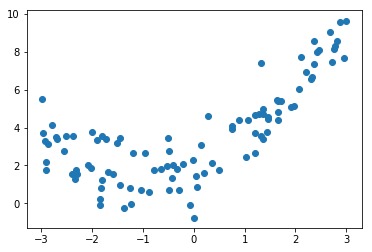

In [21]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

plt.scatter(x, y)
plt.show()

# 使用线性回归

0.4953707811865009


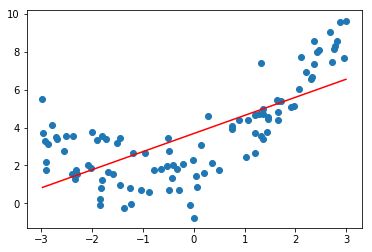

3.0750025765636577

In [22]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.score(X, y))

# 绘图
y_predict = lin_reg.predict(X)
plt.scatter(X, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color="r")
plt.show()

# 均方误差
from sklearn.metrics import mean_squared_error

y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)

# 使用多项式回归

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ("lin_reg",LinearRegression())
    ])

1.0987392142417858


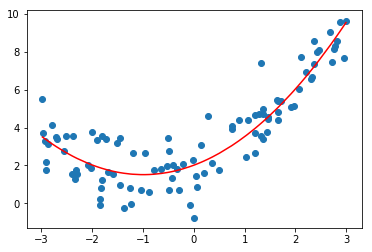

In [24]:
# degree = 2时
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X, y)

y2_predict = poly2_reg.predict(X)
print(mean_squared_error(y2_predict, y))

plt.scatter(X, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color="r")
plt.show()

1.0508466763764126


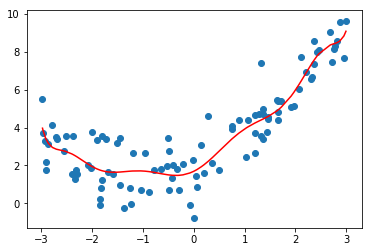

In [25]:
# degree = 10时
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X, y)

y10_predict = poly10_reg.predict(X)
print(mean_squared_error(y10_predict, y))

plt.scatter(X, y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color="r")
plt.show()

0.6811324385252567


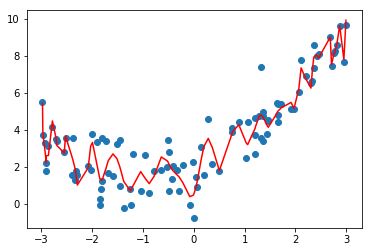

In [26]:
# degree = 100时
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)

y100_predict = poly100_reg.predict(X)
print(mean_squared_error(y100_predict, y))

plt.scatter(X, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color="r")
plt.show()

In [ ]:
# X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color="r")
plt.axis([-3, 3, -1, 10])
plt.show()

# 划分训练集和测试集的意义

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [32]:
### 使用线性回归
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_predict = lin_reg.predict(X_test)
print(mean_squared_error(y_test, y_predict))

2.2199965269396573


In [33]:
### 使用多项式回归

poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X_train, y_train)

y2_predict = poly2_reg.predict(X_test)
print(mean_squared_error(y2_predict, y_test))

0.8035641056297902


In [34]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X_train, y_train)

y10_predict = poly10_reg.predict(X_test)
print(mean_squared_error(y10_predict, y_test))

0.9212930722150695


In [35]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X_train, y_train)

y100_predict = poly100_reg.predict(X_test)
print(mean_squared_error(y100_predict, y_test))

13123134981.519402


# 在多项式回归中，degree越大，模型越复杂，在训练集上，模型准确率可能越来越好，但是训练出来的模型，在面临新的测试集时，可能会出现过拟合
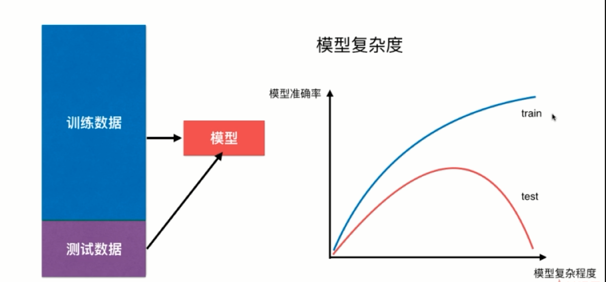


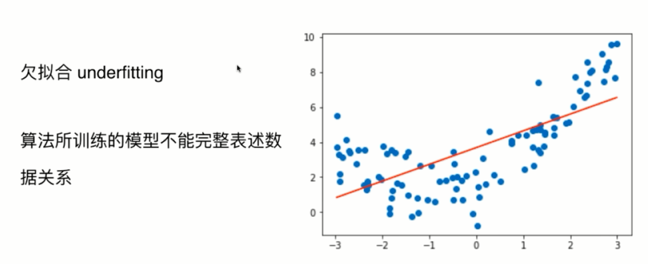

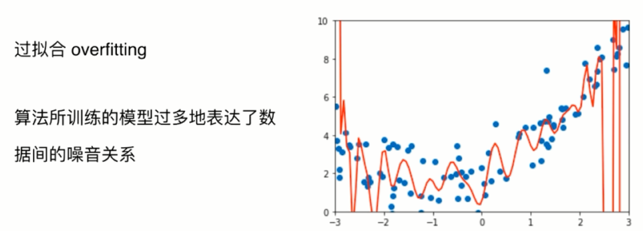

过拟合会造成模型变得复杂，并尽可能拟合训练集，造成在训练集上的准确率特别高，
这里就会有一个问题就是：训练集是不靠谱的，其中有容错的数据。
直接点，训练集中特别是十几万的数据，会有脏数据，这些脏数据也成为负样本，
会造成模型训练有误差，模型在训练的时候并不清楚那些是脏数据，它只会不停的去拟合这些数据，
所以过拟合的模型在训练集上准确率特别高，但训练集其实只是整个数据集中的一部分，
其包含两部分特征，一部分是整个数据集共有的特征，一部分是训练集自身共有的特征，
当过拟合时，模型学到的是这两部分的特征，此时拿模型去在测试集上测试时，
因为测试集不包含训练集自身共有的特征，所以测试集在模型上就不会取得很好的效果。
因此需要防止过拟合。过拟合训练集的准确率很高，其实这个训练集准确率高只能说明模型拟合数据不错，
但是 针对测试集来说效果可能就不一定了

欠拟合比较好理解就是模型简单或者说语料集偏少、特征太多，在训练集上的准确率不高，同时在测试集上的准确率也不高，这样如何训练都无法训练出有意义的参数，模型也得不到较好的效果。